In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
path_2020 = "../data/raw/2020_season/nba2021_per_game.csv"
path_2023 = "../data/raw/2022_season/2022-2023 NBA Player Stats - Playoffs.csv"

In [50]:
df_2020 = pd.read_csv(path_2020, encoding='ISO-8859-1')
df_2023 = pd.read_csv(path_2023, encoding="latin-1", sep=";")

## Visualización de los Dataframes


### Temporada 2020

In [51]:
df_2020

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,0.0,0.0,0.000,2.6,4.4,0.590,0.590,1.3,2.4,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,0.0,0.3,0.000,0.2,1.0,0.167,0.125,0.0,0.0,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,0.0,0.0,0.000,3.5,5.7,0.606,0.603,1.1,2.3,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,0.1,0.2,0.400,7.3,12.7,0.576,0.576,5.1,6.0,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,1.3,3.7,0.358,4.6,8.8,0.525,0.529,0.9,1.2,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Delon Wright,SG,28,DET,28,23,29.4,3.7,8.1,0.456,0.9,2.4,0.353,2.9,5.7,0.500,0.509,2.2,2.8,0.785,1.1,3.5,4.6,4.9,1.4,0.5,1.2,1.1,10.5
493,Thaddeus Young,PF,32,CHI,23,0,25.7,5.1,8.7,0.587,0.2,0.9,0.238,4.9,7.8,0.628,0.600,0.7,1.5,0.500,2.4,3.4,5.8,4.4,1.4,0.5,2.0,2.9,11.2
494,Trae Young,PG,22,ATL,26,26,34.7,7.6,17.7,0.429,2.3,6.2,0.369,5.3,11.5,0.462,0.493,9.0,10.2,0.887,0.7,3.2,3.8,9.3,0.8,0.3,4.3,2.0,26.5
495,Cody Zeller,C,28,CHO,15,12,24.1,4.2,8.0,0.525,0.2,1.1,0.188,4.0,6.9,0.577,0.538,1.5,1.9,0.759,2.6,5.4,8.0,2.5,0.7,0.6,0.9,2.5,10.1


In [52]:
df_2020.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.00000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,25.623742,18.456740,8.631791,19.724547,3.274447,7.157948,0.437322,1.018712,2.816097,0.300738,2.25835,4.345875,0.487899,0.506974,1.402213,1.815895,0.692213,0.808451,2.826559,3.632797,2.035010,0.609658,0.421932,1.139437,1.654728,8.962777
std,4.054229,8.311394,10.318088,9.892146,2.478254,5.068286,0.128347,0.942945,2.332628,0.163417,1.96192,3.577944,0.156681,0.146480,1.469287,1.769673,0.251333,0.769720,1.940002,2.519695,1.986807,0.427091,0.439783,0.887715,0.844111,6.885621
min,19.000000,1.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,12.000000,0.000000,11.200000,1.400000,3.200000,0.389000,0.200000,0.800000,0.250000,0.80000,1.500000,0.432000,0.468000,0.400000,0.600000,0.619000,0.300000,1.300000,1.800000,0.700000,0.300000,0.100000,0.500000,1.000000,3.700000
50%,25.000000,20.000000,3.000000,19.800000,2.700000,6.000000,0.443000,0.800000,2.300000,0.337000,1.70000,3.300000,0.505000,0.525000,1.000000,1.300000,0.759000,0.600000,2.600000,3.200000,1.400000,0.600000,0.300000,0.900000,1.700000,7.300000
75%,28.000000,26.000000,18.000000,28.100000,4.700000,10.300000,0.500000,1.600000,4.300000,0.396000,3.20000,6.100000,0.575000,0.576000,1.900000,2.400000,0.848000,1.100000,3.800000,5.000000,2.700000,0.900000,0.600000,1.500000,2.200000,12.800000
max,37.000000,30.000000,30.000000,38.300000,11.400000,24.000000,1.000000,5.000000,11.800000,1.000000,9.40000,16.600000,1.000000,1.500000,9.700000,11.300000,1.000000,4.600000,9.900000,14.000000,11.800000,2.000000,3.500000,5.000000,4.100000,32.800000


<Axes: >

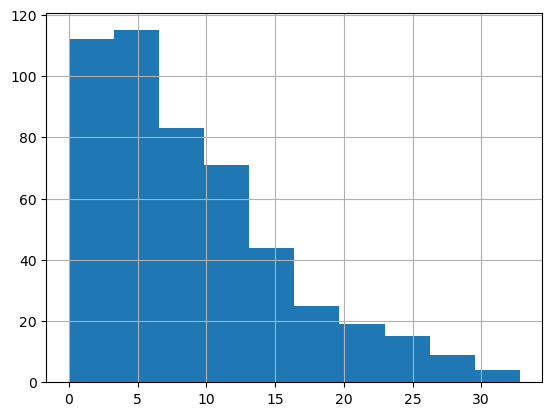

In [53]:
df_2020["PTS"].hist()

### Temporada 2023

In [ ]:
df_2023

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Bam Adebayo,C,25,MIA,23,23,37.0,7.3,15.1,0.481,0.0,0.1,0.000,7.3,15.0,0.485,0.481,3.4,4.1,0.821,2.7,7.1,9.9,3.7,0.9,0.7,2.7,3.1,17.9
1,2,Santi Aldama,PF,22,MEM,6,0,16.8,2.5,5.5,0.455,1.2,2.5,0.467,1.3,3.0,0.444,0.561,0.3,0.3,1.000,1.2,3.2,4.3,1.2,0.5,0.0,0.3,0.8,6.5
2,3,Nickeil Alexander-Walker,SG,24,MIN,5,4,29.6,3.0,7.0,0.429,2.0,5.0,0.400,1.0,2.0,0.500,0.571,0.4,0.6,0.667,0.2,1.8,2.0,1.4,0.6,0.2,0.8,1.8,8.4
3,4,Grayson Allen,SG,27,MIL,5,5,29.8,3.8,8.2,0.463,2.8,5.8,0.483,1.0,2.4,0.417,0.634,1.2,1.4,0.857,0.2,2.2,2.4,1.8,0.4,0.0,0.8,1.4,11.6
4,5,Jarrett Allen,C,24,CLE,5,5,38.2,4.4,7.2,0.611,0.0,0.0,0.000,4.4,7.2,0.611,0.611,0.6,1.2,0.500,3.0,4.4,7.4,2.4,0.8,1.0,0.6,2.0,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,213,Ziaire Williams,SF,21,MEM,4,0,3.0,0.5,1.8,0.286,0.3,0.8,0.333,0.3,1.0,0.250,0.357,0.0,0.0,0.000,0.0,0.5,0.5,0.5,0.0,0.0,0.5,0.3,1.3
213,214,Trae Young,PG,24,ATL,6,6,38.3,10.0,24.8,0.403,3.0,9.0,0.333,7.0,15.8,0.442,0.463,6.2,7.2,0.860,0.8,2.8,3.7,10.2,1.7,0.7,4.0,1.8,29.2
214,215,Omer Yurtseven,C,24,MIA,8,0,2.0,0.3,0.9,0.286,0.0,0.3,0.000,0.3,0.6,0.400,0.286,0.0,0.0,0.000,0.4,0.3,0.6,0.1,0.0,0.1,0.1,0.3,0.5
215,216,Cody Zeller,C,30,MIA,21,0,8.3,1.0,1.7,0.571,0.0,0.0,0.000,1.0,1.7,0.571,0.571,0.3,0.7,0.400,0.5,1.8,2.3,0.3,0.1,0.2,0.6,1.3,2.2


In [ ]:
df_2023.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,109.000000,27.050691,7.963134,3.870968,19.607373,3.193548,7.073272,0.399438,0.966820,2.815207,0.257590,2.230876,4.258525,0.462618,0.462871,1.355760,1.739631,0.576336,0.833180,2.605530,3.436866,1.879263,0.551152,0.379263,1.031336,1.626267,8.699078
std,62.786676,4.402463,5.848277,5.884847,13.217481,3.042653,6.380738,0.197246,0.992894,2.603505,0.211215,2.401314,4.544516,0.248977,0.219765,1.781613,2.184668,0.368579,0.955736,2.332136,3.080874,2.170826,0.531256,0.491769,1.062899,1.112430,8.375692
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,24.000000,4.000000,0.000000,6.000000,0.800000,1.900000,0.345000,0.000000,0.500000,0.000000,0.400000,0.900000,0.406000,0.400000,0.000000,0.100000,0.000000,0.100000,0.800000,1.000000,0.300000,0.000000,0.000000,0.300000,0.700000,2.000000
50%,109.000000,26.000000,6.000000,0.000000,18.600000,2.400000,5.000000,0.429000,0.700000,2.400000,0.302000,1.200000,2.300000,0.500000,0.506000,0.700000,1.000000,0.722000,0.600000,2.000000,2.600000,1.000000,0.500000,0.200000,0.700000,1.700000,6.500000
75%,163.000000,30.000000,11.000000,5.000000,30.900000,5.000000,10.300000,0.500000,1.700000,4.600000,0.380000,3.400000,6.300000,0.593000,0.579000,1.600000,2.200000,0.860000,1.200000,4.100000,5.300000,2.600000,0.800000,0.500000,1.400000,2.500000,12.700000
max,217.000000,42.000000,23.000000,23.000000,42.400000,12.800000,24.800000,1.000000,4.400000,12.100000,1.000000,10.000000,17.000000,1.000000,1.000000,8.400000,10.300000,1.000000,5.000000,11.700000,14.100000,10.200000,2.100000,3.100000,4.700000,4.800000,34.500000


<Axes: >

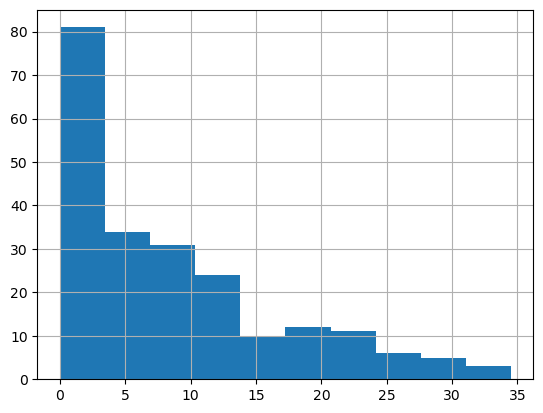

In [ ]:
df_2023["PTS"].hist()

## Primeros hayazgos

Una de las primeras cosas que he notado es que los tiros de larga distancia intentados son casi los mismos en ambos años, cabe recalcar que analizando las boxplots de el porcentaje de efectividad de larga distancia, nos percatamos de que en 2020 los tiradores fueron mucho mas consistentes, teniendo un promedio de 30% de efectividad a comparación de 2022 en donde se tiene un 25% de efectividad. 

Ademas de que la efectividad fue más elevada en 2020, la dispersión de los datos fue menor, significando mayor homogenidad en los datos. Esto significa que aunque los jugadores tomaban la misma cantidad de triples en 2020 como en 2023, la efectividad era mayor y la consistencia en la NBA era mayor

In [62]:
df_2020["3P%"].mean()

0.30073843058350097

{'whiskers': [<matplotlib.lines.Line2D at 0x1dba25fef50>,
 'caps': [<matplotlib.lines.Line2D at 0x1dba25ff490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dba25fecb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dba25ff9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dba25ffc70>],
 'means': []}

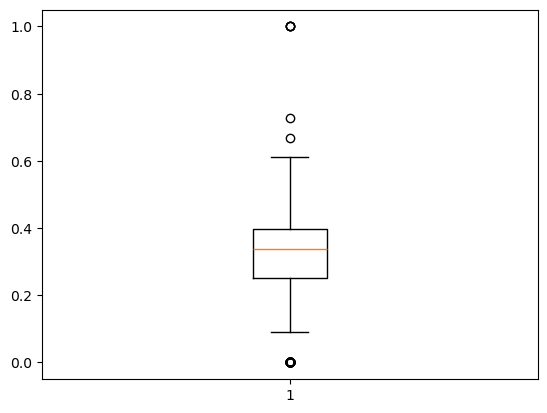

In [64]:
plt.boxplot(df_2020["3P%"])

In [66]:
df_2020["3P%"].std()

0.16341684279172647

In [63]:
df_2023["3P%"].mean()

0.25758986175115206

{'whiskers': [<matplotlib.lines.Line2D at 0x1dba258be50>,
 'caps': [<matplotlib.lines.Line2D at 0x1dba25b4400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dba258bbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dba25b4940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dba25b4be0>],
 'means': []}

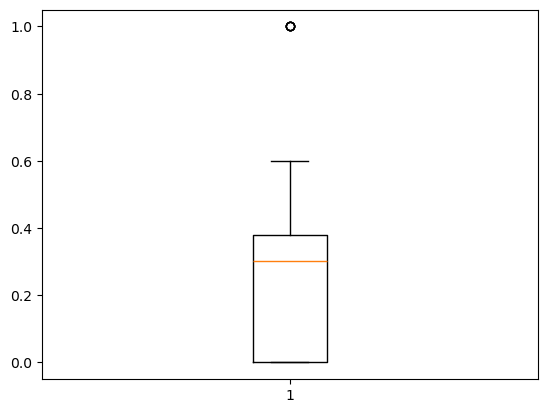

In [61]:
plt.boxplot(df_2023["3P%"])

In [67]:
df_2023["3P%"].std()

0.21121468034451663